In [1]:
#import the necessities
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import warnings
from scipy.stats import bartlett, levene
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sqlalchemy import create_engine
from statsmodels.tsa.stattools import acf
from statsmodels.tools.eval_measures import mse, rmse
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#create the authorization variables
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
houses_db = 'houseprices'

In [3]:
#create and dispose of engine
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, houses_db))

houseprices_df = pd.read_sql_query('SELECT * FROM houseprices', con=engine)

engine.dispose()

In [4]:
#create a clean copy of the houseprices_df to avoid reestablishing the connection
houseprices_copy = houseprices_df.copy()

In [9]:
#create the datasets from the previous checkpoint
houses_y = houseprices_df['saleprice']
houses_X = houseprices_df[['lotarea', 'overallqual', 'yearbuilt', 'poolarea']]

In [25]:
#create the training set and the testing set using random_state=10
#we'll also go ahead and add the constants to the training and test sets
houses_X_train, houses_X_test, houses_y_train, houses_y_test = train_test_split(houses_X, houses_y, random_state=10)
houses_X_train = sm.add_constant(houses_X_train)
houses_X_test = sm.add_constant(houses_X_test)

In [26]:
#check the results using OLS
houses_results = sm.OLS(houses_y_train, houses_X_train).fit()
display(houses_train_results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     610.6
Date:                Sat, 16 Jan 2021   Prob (F-statistic):          1.93e-276
Time:                        13:08:47   Log-Likelihood:                -13263.
No. Observations:                1095   AIC:                         2.654e+04
Df Residuals:                    1090   BIC:                         2.656e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.608e+05      1e+05     -7.585      0.000   -9.58e+05   -5.64e+05
lotarea         1.4741      0.124     11.892      0.000       1.231       1.717
overallqual  3.979e+04   1160.821     34.274      0.000    3.75e+04    4.21e+04
yearbuilt     346.8435     52.781      6.571      0.000     243.279     450.408
poolarea      222.6591     46.800      4.758      0.000     130.831     314.487
==============================================================================
Omnibus:                      356.600   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2188.918
Skew:                           1.357   Prob(JB):                         0.00
Kurtosis:                       9.373   Cond. No.                     1.14e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
#make predictions on the test data
houses_y_preds = houses_results.predict(houses_X_test)
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(houses_y_test, houses_y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(houses_y_test, houses_y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(houses_y_test, houses_y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((
    houses_y_test - houses_y_preds) / houses_y_test)) * 100))

Mean absolute error of the prediction is: 32120.44676387956
Mean squared error of the prediction is: 1993987445.098647
Root mean squared error of the prediction is: 44654.08654421952
Mean absolute percentage error of the prediction is: 20.2290927627533


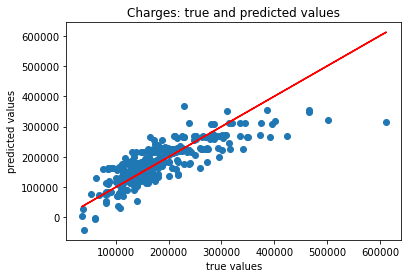

In [29]:
#visualize the data
plt.scatter(houses_y_test, houses_y_preds)
plt.plot(houses_y_test, houses_y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

In [46]:
#we'll add fireplaces and utilities to the model to see if we get improvement
houses_2_y = houseprices_df['saleprice']
houses_2_X = houseprices_df[['lotarea', 'overallqual', 'yearbuilt', 'poolarea', 'fireplaces']]
houses_2_X['No Sewer/Water'] = pd.get_dummies(houseprices_df['utilities'], drop_first=True)

In [52]:
#create a testing and training set
houses_2_X_train, houses_2_X_test, houses_2_y_train, houses_2_y_test = train_test_split(
    houses_2_X, houses_2_y, random_state=10)
houses_2_X_train = sm.add_constant(houses_2_X_train)
houses_2_X_test = sm.add_constant(houses_2_X_test)

In [53]:
#check the results again using OLS
houses_2_results = sm.OLS(houses_2_y_train, houses_2_X_train).fit()
display(houses_2_results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     402.5
Date:                Sat, 16 Jan 2021   Prob (F-statistic):          3.89e-272
Time:                        13:25:17   Log-Likelihood:                -13282.
No. Observations:                1095   AIC:                         2.658e+04
Df Residuals:                    1088   BIC:                         2.661e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -7.993e+05   1.05e+05     -7.644      0.000      -1e+06   -5.94e+05
lotarea            1.2701      0.143      8.901      0.000       0.990       1.550
overallqual     3.662e+04   1301.080     28.143      0.000    3.41e+04    3.92e+04
yearbuilt        371.6358     55.111      6.743      0.000     263.500     479.771
poolarea          51.9644     31.391      1.655      0.098      -9.629     113.558
fireplaces      1.831e+04   2365.562      7.739      0.000    1.37e+04    2.29e+04
No Sewer/Water -4.711e+04    4.5e+04     -1.047      0.296   -1.35e+05    4.12e+04
==============================================================================
Omnibus:                      492.205   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9228.373
Skew:                           1.595   Prob(JB):                         0.00
Kurtosis:                      16.860   Cond. No.                     1.12e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
#this pushed the poolarea higher and utilities is too high, so we'll drop utilities
houses_3_y = houseprices_df['saleprice']
houses_3_X = houseprices_df[['lotarea', 'overallqual', 'yearbuilt', 'poolarea', 'fireplaces']]

In [55]:
#create another testing and training set
houses_3_X_train, houses_3_X_test, houses_3_y_train, houses_3_y_test = train_test_split(
    houses_3_X, houses_3_y, random_state=10)
houses_3_X_train = sm.add_constant(houses_3_X_train)
houses_3_X_test = sm.add_constant(houses_3_X_test)

In [56]:
#check the results again using OLS
houses_3_results = sm.OLS(houses_3_y_train, houses_3_X_train).fit()
display(houses_3_results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     482.8
Date:                Sat, 16 Jan 2021   Prob (F-statistic):          2.91e-273
Time:                        13:27:06   Log-Likelihood:                -13283.
No. Observations:                1095   AIC:                         2.658e+04
Df Residuals:                    1089   BIC:                         2.661e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -8.007e+05   1.05e+05     -7.658      0.000   -1.01e+06   -5.96e+05
lotarea         1.2690      0.143      8.893      0.000       0.989       1.549
overallqual  3.662e+04   1301.134     28.144      0.000    3.41e+04    3.92e+04
yearbuilt     372.3457     55.109      6.757      0.000     264.214     480.478
poolarea       52.1097     31.392      1.660      0.097      -9.486     113.705
fireplaces   1.826e+04   2365.311      7.721      0.000    1.36e+04    2.29e+04
==============================================================================
Omnibus:                      492.014   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9193.674
Skew:                           1.595   Prob(JB):                         0.00
Kurtosis:                      16.832   Cond. No.                     1.12e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
#poolarea is still too high, so we'll cut that
houses_4_y = houseprices_df['saleprice']
houses_4_X = houseprices_df[['lotarea', 'overallqual', 'yearbuilt', 'fireplaces']]

In [58]:
#create yet another testing and training set
houses_4_X_train, houses_4_X_test, houses_4_y_train, houses_4_y_test = train_test_split(
    houses_4_X, houses_4_y, random_state=10)
houses_4_X_train = sm.add_constant(houses_4_X_train)
houses_4_X_test = sm.add_constant(houses_4_X_test)

In [59]:
#check the results again using OLS
houses_4_results = sm.OLS(houses_4_y_train, houses_4_X_train).fit()
display(houses_4_results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     601.8
Date:                Sat, 16 Jan 2021   Prob (F-statistic):          4.40e-274
Time:                        13:29:22   Log-Likelihood:                -13284.
No. Observations:                1095   AIC:                         2.658e+04
Df Residuals:                    1090   BIC:                         2.660e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -7.95e+05   1.05e+05     -7.602      0.000      -1e+06    -5.9e+05
lotarea         1.2843      0.143      9.013      0.000       1.005       1.564
overallqual  3.673e+04   1300.544     28.240      0.000    3.42e+04    3.93e+04
yearbuilt     369.0490     55.118      6.696      0.000     260.901     477.197
fireplaces   1.845e+04   2364.431      7.805      0.000    1.38e+04    2.31e+04
==============================================================================
Omnibus:                      525.791   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9904.427
Skew:                           1.747   Prob(JB):                         0.00
Kurtosis:                      17.314   Cond. No.                     1.12e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
#make predictions on the model test data
houses_4_y_preds = houses_results.predict(houses_4_X_test)
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(houses_4_y_test, houses_4_y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(houses_4_y_test, houses_4_y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(houses_4_y_test, houses_4_y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((
    houses_4_y_test - houses_4_y_preds) / houses_4_y_test)) * 100))

Mean absolute error of the prediction is: 32145.912975018276
Mean squared error of the prediction is: 1994192765.6777618
Root mean squared error of the prediction is: 44656.38549723614
Mean absolute percentage error of the prediction is: 20.24218773048806


In comparing the two sets of stats, the first model is better than the fourth. While the Adj. R-squared value isn't the greatest, it is high enough that I would be willing to use the model. However, I would continue tuning it to see if I could raise the R-squared value.